In [40]:
import numpy as np 
import pandas as pd
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import cv2
from matplotlib import pyplot as plt

In [87]:
train=ImageDataGenerator(rescale=1/255,validation_split=0.05)#total images=40000,train images=38000,val images=2000

In [88]:
train_dataset=train.flow_from_directory('../input/surface-crack-detection',#use your directory location
                                       target_size=(150,150),
                                       batch_size=32,
                                       class_mode='binary',
                                       subset='training',           
                                       )
val_dataset=train.flow_from_directory('../input/surface-crack-detection',#use your directory location
                                       target_size=(150,150),
                                      batch_size=32,
                                       class_mode='binary',
                                       subset='validation',           
                                       )

Found 38000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [89]:
train_dataset.class_indices

{'Negative': 0, 'Positive': 1}

In [91]:
model=Sequential()
model.add(Conv2D(256,(1,1),input_shape=(128,128,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 256)     1024      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 256)       65792     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 256)       65792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 256)      

In [92]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
history=model.fit(train_dataset,epochs=1,validation_data=val_dataset,batch_size=128)

Epoch 1/2
1188/1188 [==============================] - 96s 81ms/step - loss: 0.0512 - accuracy: 0.9879 - val_loss: 0.0295 - val_accuracy: 0.9925
Epoch 2/2
1188/1188 [==============================] - 97s 81ms/step - loss: 0.0424 - accuracy: 0.9897 - val_loss: 0.0303 - val_accuracy: 0.9920


#  **Check For Your Own Image**

In [77]:
img=image.load_img('../input/my-data1/nocrack1.jpg',target_size=(150,150))

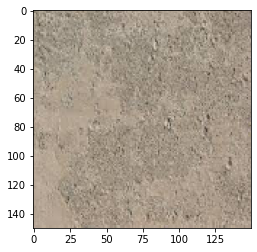

In [78]:
plt.imshow(img)

In [79]:
img1=image.img_to_array(img)
img1=img1/255

In [80]:
img1=np.expand_dims(img1,[0])
print(img1.shape)

(1, 150, 150, 3)


In [81]:
pred=model.predict(img1)
if(pred[0]>=0.5):
    print("Crack Detected")
else:
    print("No Crack Detected")

No Crack Detected


In [82]:
pred

array([[0.00119081]], dtype=float32)